### Analysis on sales data for a E-Commerce store. 

#### Questions:  

    - What month holds the highest sales? 
    - Which City has the highest order sales? 
    - What is the most sold product and why?
    - Understanding the trend of the most sold products. 
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Read data from feather

sales_df = pd.read_feather("Sales_data.ftr")

In [3]:
sales_df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
sales_df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [5]:
sales_df.columns = [s.replace(' ', '_') for s in sales_df.columns]

In [6]:
sales_df.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

Here we can see that the Sales dataframe contains information on electronics store purchases that is broken down by Order date, Price, Product type, Quantity ordered, and Purchase address. 

In [7]:
sales_df.shape

(186850, 6)

In [8]:
sales_df.count()

Order_ID            186305
Product             186305
Quantity_Ordered    186305
Price_Each          186305
Order_Date          186305
Purchase_Address    186305
dtype: int64

In [9]:
# Check to see if there are any missing values in df

sales_df.isnull().sum()

Order_ID            545
Product             545
Quantity_Ordered    545
Price_Each          545
Order_Date          545
Purchase_Address    545
dtype: int64

### Data Cleanig

In [10]:
missing_df = sales_df[sales_df.isnull().any(axis = 1)]

In [11]:
missing_df.head(10)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
1,None,None,None,None,None,None
356,None,None,None,None,None,None
735,None,None,None,None,None,None
1433,None,None,None,None,None,None
1553,None,None,None,None,None,None
1571,None,None,None,None,None,None
1992,None,None,None,None,None,None
2265,None,None,None,None,None,None
2798,None,None,None,None,None,None
3024,None,None,None,None,None,None


<Axes: >

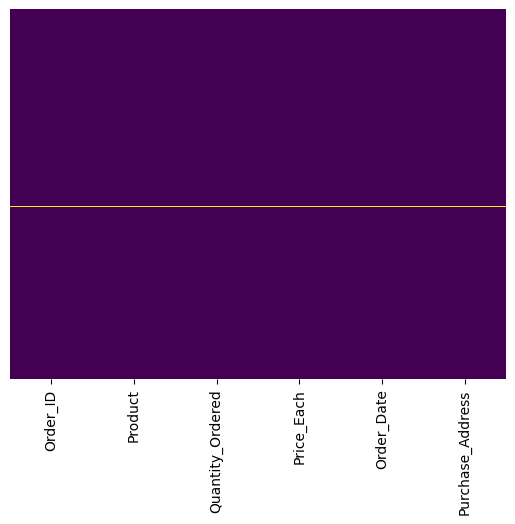

In [12]:
# Visual representation of missing values. Yellow line is the missing data in the heatmap. 

sns.heatmap(sales_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [13]:
# 545 observations where entire row have missing values we will drop the missing values.

sales_df = sales_df.dropna()

sales_df.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

In [14]:
sales_df.shape

(186305, 6)

In [15]:
# check to see if we have duplicate values

sales_df.duplicated().sum()

618

In [16]:
# Take a look at 618 duplicate values

sales_df[sales_df.duplicated()]

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [17]:
# Drop all the duplicated data

sales_df = sales_df.drop_duplicates()

In [18]:
sales_df.shape

(185687, 6)

In [19]:
sales_df[sales_df.duplicated()]

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address


## Look into which month is the best for sales

We will look to see which month has the maximum sales and consider it the best month for sales. 

In [20]:
sales_df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [21]:
# We will create a column for month using the Order_date feature. 

sales_df['Order_Date'][0].split('/')

['04', '19', '19 08:46']

In [23]:

sales_df['Order_Date'][0].split('/')[0]

'04'

In [24]:
# Create a function to return the month from Order_Date feature. 

def return_month(x):
    return x.split('/')[0]

In [25]:
# Apply the return function on top of "Order Date" feature and assign it to the Month column.

sales_df['Month'] = sales_df['Order_Date'].apply(return_month)

In [26]:
sales_df.dtypes

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
Month               object
dtype: object

In [86]:
# Ran into issue with converting col Month into integer type.

sales_df['Month'].astype('int')

ValueError: invalid literal for int() with base 10: 'Order Date'

In [27]:
# Lets look into the value counts of the Month to confirm that there is a value with Order Date. 

sales_df['Month'].value_counts()

Month
12            24944
10            20249
04            18257
11            17544
05            16552
03            15128
07            14275
06            13535
02            11957
08            11943
09            11603
01             9699
Order Date        1
Name: count, dtype: int64

In [28]:
# We create a filter to look at the row where Month is equal to Order Date. 

filt_1 = sales_df['Month'] == 'Order Date'

In [29]:
sales_df[filt_1]

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [30]:
# We will drop this row since we don't need it.

sales_df = sales_df.drop(519)

In [31]:
sales_df.shape

(185686, 7)

In [32]:
sales_df['Month'] = sales_df['Month'].astype('int')

In [33]:
sales_df.dtypes

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
Month                int32
dtype: object

In [34]:
sales_df.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address', 'Month'],
      dtype='object')

In [35]:
# Convert other columns into int and float data types

sales_df['Quantity_Ordered'] = sales_df['Quantity_Ordered'].astype('int')

sales_df['Price_Each'] = sales_df['Price_Each'].astype('float')

In [36]:
sales_df.dtypes

Order_ID             object
Product              object
Quantity_Ordered      int32
Price_Each          float64
Order_Date           object
Purchase_Address     object
Month                 int32
dtype: object

In [37]:
# Create sales column/feature

sales_df['sales'] = sales_df['Quantity_Ordered'] * sales_df['Price_Each']
sales_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [43]:
# WE will group the data by Month them we will sum the sales for each Month. 

sales_df.groupby(['Month'])['sales'].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

<Axes: xlabel='Month'>

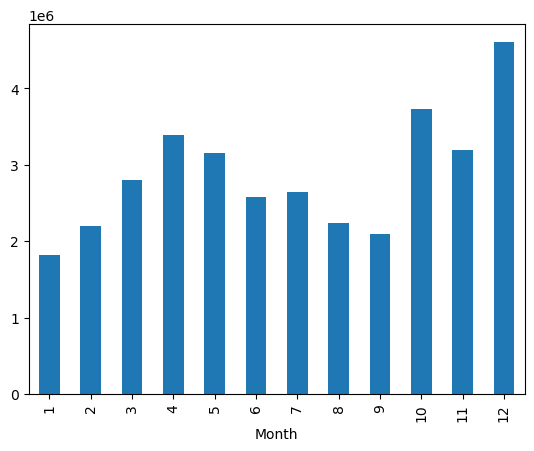

In [39]:
sales_df.groupby(['Month'])['sales'].sum().plot(kind = 'bar')

Insights:

Here we can see that December has the highest sales and is the best month. 

## Which City has the highest amount of orders?

In [100]:
sales_df['Purchase_Address'][0]

'917 1st St, Dallas, TX 75001'

In [101]:
# We will seperate the string in Purchase address to get the city

sales_df['Purchase_Address'][0].split(',')[1]

' Dallas'

In [102]:
# Create a lamda func and apply it to Purchase Address

sales_df['City'] = sales_df['Purchase_Address'].apply(lambda x:x.split(',')[1])

In [103]:
sales_df.City

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: City, Length: 185686, dtype: object

In [104]:
## Frequency table showing counts for each city

sales_df['City'].value_counts()

City
 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: count, dtype: int64

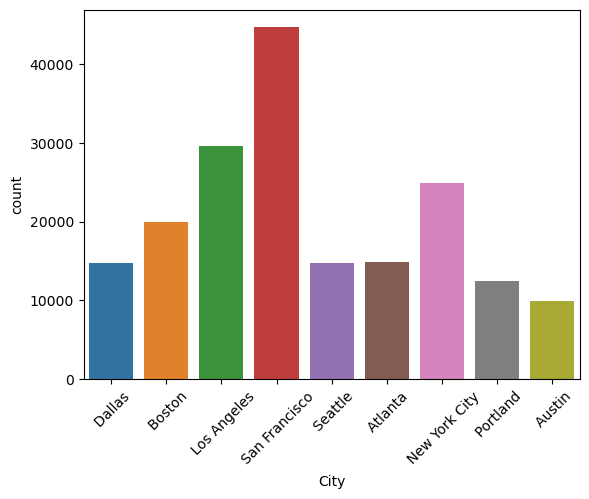

In [105]:
sns.countplot(x = 'City', data = sales_df,)
plt.xticks(rotation = 45)

plt.show()

Insights: 

San Francisco, Los Angeles, and New York City are the top 3 cities with the highest orders.  San Francisco has the highest amoung the 3. 

## What product sold the most and why? 

In [44]:
sales_df.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address', 'Month', 'sales'],
      dtype='object')

In [62]:
count_df = sales_df.groupby(['Product']).agg({'Quantity_Ordered': 'sum', 'Price_Each': 'mean'})

In [63]:
count_df = count_df.reset_index()

In [64]:
count_df

,Product,Quantity_Ordered,Price_Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


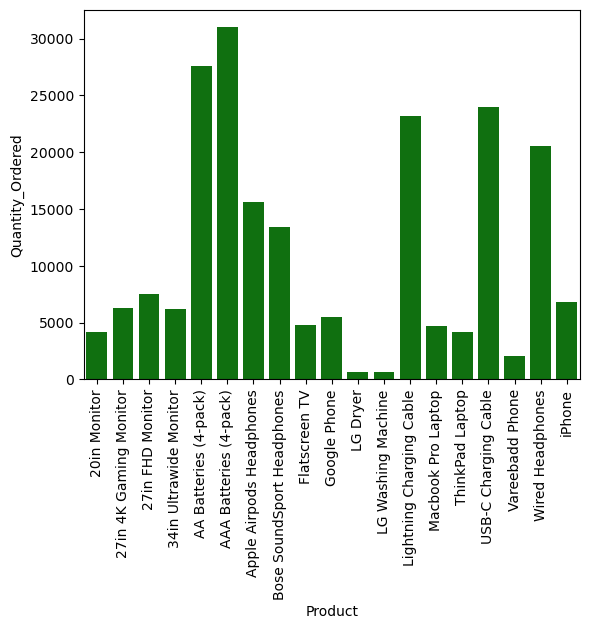

In [50]:
ax = sns.barplot(data = count_df, x = 'Product', y = 'Quantity_Ordered', color = 'green')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 'vertical')

plt.show()

In [86]:
# lets look to see if there is any correlation between price and quantity ordered. 

subdf = count_df[['Quantity_Ordered','Price_Each']]

subdf.corr()

,Quantity_Ordered,Price_Each
Quantity_Ordered,1.000000,-0.601297
Price_Each,-0.601297,1.000000


In [78]:
products = count_df['Product'].values

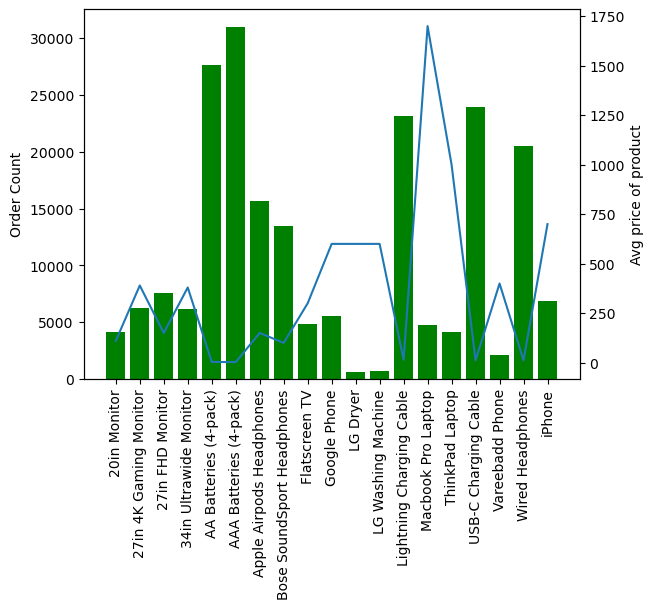

In [87]:
# We will add a line plot for avg. price of each item into the previous bar chart. 
# The y axis will be on the right hand side for this feature. 

fig , ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(count_df['Product'] , count_df['Quantity_Ordered'] , color='g')
ax2.plot(count_df['Product'] , count_df['Price_Each'] )

ax1.set_xticks(products, labels = products ,rotation= 90 , fontsize=10 )

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of product')

plt.show()

Insights: 

The top selling product is 'AAA Batteries'. 

The top selling products seems to have a correlation with the price of the product. The cheaper the product the higher the quantity ordered and vice versa. 


## Understanding the Trend of the most sold product?

In [118]:
# Pull the 5 most sold products 

sales_df['Product'].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [119]:
most_sold_product = sales_df['Product'].value_counts()[0:5].index

In [120]:
sales_df['Product'].isin(most_sold_product)

0          True
2         False
3         False
4          True
5          True
          ...  
186845     True
186846    False
186847    False
186848    False
186849     True
Name: Product, Length: 185686, dtype: bool

In [121]:
most_sold_product_df = sales_df[sales_df['Product'].isin(most_sold_product)]

In [122]:
most_sold_product_df.head(5)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta


In [124]:
most_sold_product_df.groupby(['Month','Product']).size()

Month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [125]:
pivot = most_sold_product_df.groupby(['Month' , 'Product']).size().unstack()

<Axes: xlabel='Month'>

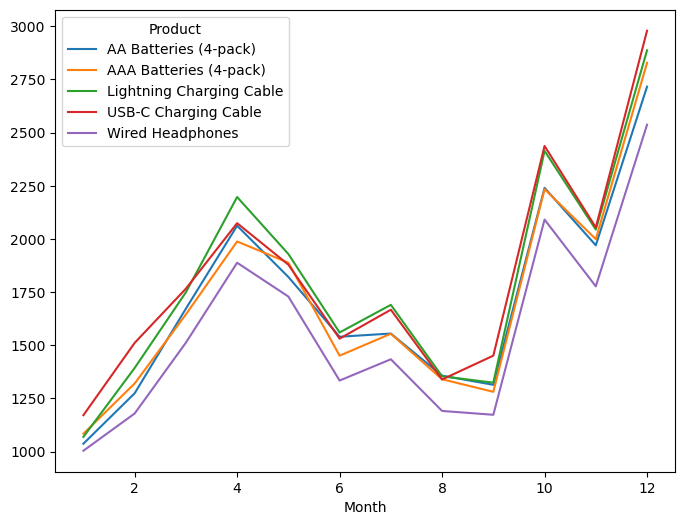

In [127]:
pivot.plot(figsize = (8,6))

Insights: 
    
    Products sold the most in October, November, and December. 